# Baseball Stadium Data Project

This project aims to combine data from Baseball-reference.com on baseball team statistics from the 2017 season with data from an ESPN health code violation study, compilation of review scores from Google and Yelp done by ReviewTrackers.com on baseball stadiums, and average monthly temperature and precipitation through the 2017 season. This notebook will go through the process of combining all of those datasets and how these datasets relate to one another.

### ESPN

The first dataset is taken from a study ESPN did looking at health code violations for all 30 stadiums. This data provides a good point of comparison when paired next to the review score data shown later. It's first in this notebook because it contains things like the team name, stadium, and location that will make adding and combining other datasets together easier.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ESPN_data = '1-ESPN-health-data/ESPN_stadium_violations.CSV'

In [3]:
ESPN = pd.read_csv(ESPN_data)

In [4]:
ESPN

,Team,Stadium,Seating Capacity,Location,State Abbreviation,Venue Score,Area Score,Total Inspections,Critical Inspections Found,Critical Score in percentage
0,Diamondbacks,Chase Field,48519,"Phoenix, Arizona",AZ,0.20,0.25,96,33,34.38
1,Padres,Petco Park,40162,"San Diego, California",CA,0.09,0.09,168,28,16.67
2,Angels,Angel Stadium,45050,"Anaheim, California",CA,0.17,0.46,134,26,19.40
3,Athletics,Oakland-Alameda County Coliseum,63024,"Oakland, California",CA,0.18,1.32,119,27,22.69
4,Giants,AT&T Park,41915,"San Francisco, California",CA,0.10,0.25,162,40,24.69
5,Dodgers,Dodger Stadium,56000,"Los Angeles, California",CA,0.29,0.96,191,61,31.94
6,Rockies,Coors Field,50144,"Denver, Colorado",CO,1.14,1.50,107,77,71.96
7,Nationals,Nationals Park,41546,"Washington, District of Columbia",DC,0.28,0.00,27,14,51.85
8,Marlins,Marlins Park,37442,"Miami, Florida",FL,0.13,1.07,21,3,14.29
9,Rays,Tropicana Field,31042,"Tampa, Florida",FL,0.40,1.07,79,25,31.65


There are a total of 11 different columns in this dataset, and the critical score in percentage is an equation that's based on the venue score, area score, and total inspections numbers.

In [5]:
ESPN.columns

Index(['Team', 'Stadium', 'Seating Capacity', 'Location', 'State Abbreviation',
       'Venue Score', 'Area Score', 'Total Inspections',
       'Critical Inspections Found', 'Critical Score in percentage'],
      dtype='object')

#### Extracting necessary data out of the ESPN CSV

For the purpose of my final dataset, I want the Critical Score in percentage, since it is a result of total inspections divided by the number of critical inspections found. I also wanted the team names and stadium names. The location will be the most important column in this dataset when it comes to corss-referencing and combining in other datasets that have a similar City, State phrasing.

In [6]:
ESPN_df = ESPN[['Team', 'Stadium', 'Seating Capacity', 'Location', 'Critical Score in percentage']]

In [7]:
ESPN_df

,Team,Stadium,Seating Capacity,Location,Critical Score in percentage
0,Diamondbacks,Chase Field,48519,"Phoenix, Arizona",34.38
1,Padres,Petco Park,40162,"San Diego, California",16.67
2,Angels,Angel Stadium,45050,"Anaheim, California",19.40
3,Athletics,Oakland-Alameda County Coliseum,63024,"Oakland, California",22.69
4,Giants,AT&T Park,41915,"San Francisco, California",24.69
5,Dodgers,Dodger Stadium,56000,"Los Angeles, California",31.94
6,Rockies,Coors Field,50144,"Denver, Colorado",71.96
7,Nationals,Nationals Park,41546,"Washington, District of Columbia",51.85
8,Marlins,Marlins Park,37442,"Miami, Florida",14.29
9,Rays,Tropicana Field,31042,"Tampa, Florida",31.65


### Stadium and Team Stats from Baseball-reference.com

Baseball-reference.com has baseball stats for just about any kind of stat you throw at it, and this dataset is a full list of team stats and records for the 2017 season. It ranks them by best record to worst record in this dataset but won't entirely be necessary when combining this data with attendance data. I grabbed other statistics like the W-L% and Run Differential for any other kind of further analysis to be done, but for the purposes of our final dataset they are not totally necessary.

In [8]:
team_stats = '3-Baseball-reference-team-data/Team_stats_2017.CSV'

In [9]:
stats = pd.read_csv(team_stats)

In [10]:
stats

,Rk,Team,Lg,G,W,L,W-L%,R,RA,Rdiff,Home,Road
0,1.0,Dodgers,NL,162.0,104,58,0.642,4.8,3.6,1.2,57-24,47-34
1,2.0,Indians,AL,162.0,102,60,0.630,5.0,3.5,1.6,49-32,53-28
2,3.0,Astros,AL,162.0,101,61,0.624,5.5,4.3,1.2,48-33,53-28
3,4.0,Nationals,NL,162.0,97,65,0.599,5.1,4.1,0.9,47-34,50-31
4,5.0,Red Sox,AL,162.0,93,69,0.574,4.8,4.1,0.7,48-33,45-36
5,6.0,Diamondbacks,NL,162.0,93,69,0.574,5.0,4.1,0.9,52-29,41-40
6,7.0,Cubs,NL,162.0,92,70,0.568,5.1,4.3,0.8,48-33,44-37
7,8.0,Yankees,AL,162.0,91,71,0.562,5.3,4.1,1.2,51-30,40-41
8,9.0,Rockies,NL,162.0,87,75,0.537,5.1,4.7,0.4,46-35,41-40
9,10.0,Brewers,NL,162.0,86,76,0.531,4.5,4.3,0.2,46-38,40-38


From this dataset I'll be taking the team name, Wins, Losses, and their Home Record. The Away record is not necessary because we are looking at data relating to each team's stadium and those are games that are played at home, in said stadium. This will be a good reference point to see how a team plays at home as opposed to the entire season record. The away record would be a good reference point as well, but is just not as necessary and would not narrow in on the purpose of this project.

In [11]:
team_stats_df = stats[['Team', 'W', 'L', 'Home']]

Below is each team's 2017 attendance data including a few other factors for batters and pitchers. The previous ESPN dataset included the seating capacity of each stadium, but this dataset below includes the overall sum of attendance of games for the 2017 season. That only includes each team's home games, a total of 81 games. It also includes the average attendance per game attended at each home game for a team at their own stadium.</p>

The Payroll column is one worth noting for a few reasons. This number represents the overall yearly payroll that a team needs to pay its players. The numbers vary considerably and would provide some insight into the team's overall success in that year. The Time played column was one that seemed like it might provide some sort of insight into fan enjoyment, but the average time of a game was so similar across the entire league that it would not provide any other meaningful analysis.

In [12]:
team_attendance = '3-Baseball-reference-team-data/Team_attendance_2017.CSV'

In [13]:
attendance = pd.read_csv(team_attendance)

In [14]:
attendance

,Team,Attendance,Attend/G,BPF (Batting Park Factor - > 100 favors batters),PPF (Pitching Park Factor - > 100 favors batters),Est. Payroll,Time
0,Diamondbacks,2134375,26350,108,108,"$106,580,200",3:09
1,Braves,2505252,30929,100,100,"$119,705,250",3:04
2,Orioles,2028424,25042,97,99,"$161,621,633",3:09
3,Red Sox,2917678,36021,105,104,"$200,550,750",3:20
4,Cubs,3199562,39501,103,101,"$177,210,667",3:09
5,White Sox,1629470,20117,97,98,"$97,842,000",3:10
6,Reds,1836917,22678,101,103,"$79,315,786",3:03
7,Indians,2048138,25286,106,104,"$114,427,167",3:06
8,Rockies,2953650,36465,117,116,"$106,650,000",3:11
9,Tigers,2321599,28662,101,102,"$118,375,600",3:14


In [15]:
team_attendance_df = attendance[['Team', 'Attendance', 'Attend/G']]

#### Baseball-reference Merging

For the final dataset, the necessary columns of data needed include the team's record and only their Home record to directly compare to their attendance and attendance per game statistics. This currently still reflects a rank of the team with the best record to the worst record, and that's largely unimportant for this project. </p>

The file below labeled team_data_df now reflects both intermediate datasets taken from baseball-reference.com combined into one dataset.

In [16]:
df_list = [ESPN_df, team_stats_df, team_attendance_df]

In [17]:
team_data_df = pd.merge(team_stats_df, team_attendance_df, on=['Team'])

In [18]:
team_data_df

,Team,W,L,Home,Attendance,Attend/G
0,Dodgers,104,58,57-24,3765856,46492
1,Indians,102,60,49-32,2048138,25286
2,Astros,101,61,48-33,2403671,29675
3,Nationals,97,65,47-34,2524980,31173
4,Red Sox,93,69,48-33,2917678,36021
5,Diamondbacks,93,69,52-29,2134375,26350
6,Cubs,92,70,48-33,3199562,39501
7,Yankees,91,71,51-30,3154938,38950
8,Rockies,87,75,46-35,2953650,36465
9,Brewers,86,76,46-38,2627705,31282


In [19]:
combined_data = pd.merge(ESPN_df, team_data_df, left_on='Team', right_on='Team')
# result.set_index('MLB Team', inplace=True) This can rename the index for future use once the final dataset is done

Here is a combination of all of the data merged into one so far. It includes the health code data with team statistics. It used the team name as a point of comparison to line up the data correctly so that the W-L record and attendance data corresponded to the correct team and stadium. Now it is back to no particular order from top to bottom, though now we can see the critical health code violation scores directly next to a team's 2017 record.

In [20]:
combined_data

,Team,Stadium,Seating Capacity,Location,Critical Score in percentage,W,L,Home,Attendance,Attend/G
0,Diamondbacks,Chase Field,48519,"Phoenix, Arizona",34.38,93,69,52-29,2134375,26350
1,Padres,Petco Park,40162,"San Diego, California",16.67,71,91,43-38,2138491,26401
2,Angels,Angel Stadium,45050,"Anaheim, California",19.40,80,82,43-38,3019585,37279
3,Athletics,Oakland-Alameda County Coliseum,63024,"Oakland, California",22.69,75,87,46-35,1475721,18219
4,Giants,AT&T Park,41915,"San Francisco, California",24.69,64,98,38-43,3303652,40786
5,Dodgers,Dodger Stadium,56000,"Los Angeles, California",31.94,104,58,57-24,3765856,46492
6,Rockies,Coors Field,50144,"Denver, Colorado",71.96,87,75,46-35,2953650,36465
7,Nationals,Nationals Park,41546,"Washington, District of Columbia",51.85,97,65,47-34,2524980,31173
8,Marlins,Marlins Park,37442,"Miami, Florida",14.29,77,85,42-36,1583014,20295
9,Rays,Tropicana Field,31042,"Tampa, Florida",31.65,80,82,42-39,1253619,15477


### Fan Review Scores

These review scores were compiled from places like Google and Yelp from user reviews and put into four main categories. This dataset took the average score of the four categories to get an aggregate review score. Most average scores come out to about the same except for about the bottom 4 or 5. The average scores look nominally different when lined up in descending order, but once they are combined into the larger dataset will prove useful for further analysis.

In [21]:
review_scores = '4-Voice-of-Fan-Report-2017/Voice-of-fan-report-2017-averages.CSV'

In [22]:
scores = pd.read_csv(review_scores)

In [23]:
scores

,Stadium,Facility,Family,Fan Experience,Food and Drink,Average Score
0,Oriole Park at Camden Yards,0.757803,0.752108,0.873283,0.687303,0.767624
1,PNC Park,0.743191,0.786538,0.926634,0.607895,0.766065
2,AT&T Park,0.693962,0.742471,0.918825,0.696970,0.763057
3,Safeco Field,0.702100,0.736655,0.853112,0.694370,0.746559
4,Kauffman Stadium,0.730978,0.771020,0.873270,0.549474,0.731185
5,Great American Ball Park,0.717445,0.730711,0.887528,0.588235,0.730980
6,Progressive Field,0.713092,0.699588,0.842742,0.666667,0.730522
7,Coors Field,0.636495,0.766744,0.880915,0.626043,0.727549
8,Petco Park,0.630174,0.720792,0.819393,0.678632,0.712248
9,Citizens Bank Park,0.674731,0.609562,0.854957,0.699583,0.709708


The only score that's vitally needed for the final dataset is the average score of the four categories from the dataset above. For future use, you could take the fan experience score or the facilities score to compare it with weather data, but the final dataset is looked at the 2017 season as a whole in comparison to overall fan experience, average monthly weather, and team statistics. 

In [24]:
review_scores_df = scores[['Stadium', 'Average Score']]
review_scores_df

,Stadium,Average Score
0,Oriole Park at Camden Yards,0.767624
1,PNC Park,0.766065
2,AT&T Park,0.763057
3,Safeco Field,0.746559
4,Kauffman Stadium,0.731185
5,Great American Ball Park,0.730980
6,Progressive Field,0.730522
7,Coors Field,0.727549
8,Petco Park,0.712248
9,Citizens Bank Park,0.709708


### Weather Data

The weather data below looks at average temperature and total precipitation through the months of a baseball season, May through October. It then compares that average to the average data from 1981-2010 and gives a comparison to that aggregate. 

In [25]:
weather_temp = '6-NOAA-Weather/stadium_temp_list.csv'

In [26]:
temp = pd.read_csv(weather_temp)

This dataset is the average monthly temperature for each city that a baseball stadium is located within. The anomalies and previous 30 year average provide their own analysis within this dataset to consider, but the final dataset is mainly concerned with 2017. 

In [27]:
temp

,Location,Average Temperature May-Oct 2017,1981-2010 Average,Anomaly
0,"Phoenix, Arizona",89.0,87.5,1.5
1,"Anaheim, California",71.7,69.6,2.1
2,"Los Angeles, California",69.4,66.7,2.7
3,"Oakland, California",68.5,66.5,2.0
4,"San Diego, California",70.4,68.3,2.1
5,"San Francisco, California",64.7,62.4,2.3
6,"Denver, Colorado",64.3,63.8,0.5
7,"Miami, Florida",82.7,81.8,0.9
8,"Tampa, Florida",82.4,81.0,1.4
9,"Atlanta, Georgia",74.6,74.5,0.1


In [28]:
temp_df = temp[['Location', 'Average Temperature May-Oct 2017']]
temp_df

,Location,Average Temperature May-Oct 2017
0,"Phoenix, Arizona",89.0
1,"Anaheim, California",71.7
2,"Los Angeles, California",69.4
3,"Oakland, California",68.5
4,"San Diego, California",70.4
5,"San Francisco, California",64.7
6,"Denver, Colorado",64.3
7,"Miami, Florida",82.7
8,"Tampa, Florida",82.4
9,"Atlanta, Georgia",74.6


In [29]:
weather_precip = '6-NOAA-Weather/stadium_precip_list.CSV'

In [30]:
precip = pd.read_csv(weather_precip)

Here is the same layout and anomalies but for average monthly precipitation. Once again, we only want the total precipitation for the 2017 months of the baseball season for our final dataset.

In [31]:
precip

,Location,Total Precipitation May-Oct 2017,1981-2010 Average,Anomaly
0,"Phoenix, Arizona",2.34,3.40,-1.06
1,"Anaheim, California",0.68,1.09,-0.41
2,"Los Angeles, California",0.20,1.15,-0.95
3,"Oakland, California",0.35,2.14,-1.79
4,"San Diego, California",1.01,0.96,0.05
5,"San Francisco, California",0.47,1.74,-1.27
6,"Denver, Colorado",10.38,10.29,0.09
7,"Miami, Florida",67.28,46.64,20.64
8,"Tampa, Florida",38.83,32.16,6.67
9,"Atlanta, Georgia",28.59,24.67,3.92


In [32]:
precip_df = precip[['Location', 'Total Precipitation May-Oct 2017']]
precip_df

,Location,Total Precipitation May-Oct 2017
0,"Phoenix, Arizona",2.34
1,"Anaheim, California",0.68
2,"Los Angeles, California",0.20
3,"Oakland, California",0.35
4,"San Diego, California",1.01
5,"San Francisco, California",0.47
6,"Denver, Colorado",10.38
7,"Miami, Florida",67.28
8,"Tampa, Florida",38.83
9,"Atlanta, Georgia",28.59


In [33]:
weather_df = pd.merge(temp_df, precip_df, on='Location')

Now we have a dataset with the average monthly temperate and total monthly precipitation for the 2017 baseball season.

In [34]:
weather_df

,Location,Average Temperature May-Oct 2017,Total Precipitation May-Oct 2017
0,"Phoenix, Arizona",89.0,2.34
1,"Anaheim, California",71.7,0.68
2,"Los Angeles, California",69.4,0.20
3,"Oakland, California",68.5,0.35
4,"San Diego, California",70.4,1.01
5,"San Francisco, California",64.7,0.47
6,"Denver, Colorado",64.3,10.38
7,"Miami, Florida",82.7,67.28
8,"Tampa, Florida",82.4,38.83
9,"Atlanta, Georgia",74.6,28.59


In [35]:
combined_data_2 = pd.merge(combined_data, weather_df, left_on=['Location'], right_on=['Location'])

Now we'll combine the previously compiled dataset with the combined weather data. The weather averages will be added to the far right side of the data table next to attendance data. 

In [36]:
combined_data_2

,Team,Stadium,Seating Capacity,Location,Critical Score in percentage,W,L,Home,Attendance,Attend/G,Average Temperature May-Oct 2017,Total Precipitation May-Oct 2017
0,Diamondbacks,Chase Field,48519,"Phoenix, Arizona",34.38,93,69,52-29,2134375,26350,89.0,2.34
1,Padres,Petco Park,40162,"San Diego, California",16.67,71,91,43-38,2138491,26401,70.4,1.01
2,Angels,Angel Stadium,45050,"Anaheim, California",19.40,80,82,43-38,3019585,37279,71.7,0.68
3,Athletics,Oakland-Alameda County Coliseum,63024,"Oakland, California",22.69,75,87,46-35,1475721,18219,68.5,0.35
4,Giants,AT&T Park,41915,"San Francisco, California",24.69,64,98,38-43,3303652,40786,64.7,0.47
5,Dodgers,Dodger Stadium,56000,"Los Angeles, California",31.94,104,58,57-24,3765856,46492,69.4,0.20
6,Rockies,Coors Field,50144,"Denver, Colorado",71.96,87,75,46-35,2953650,36465,64.3,10.38
7,Nationals,Nationals Park,41546,"Washington, District of Columbia",51.85,97,65,47-34,2524980,31173,73.2,23.87
8,Marlins,Marlins Park,37442,"Miami, Florida",14.29,77,85,42-36,1583014,20295,82.7,67.28
9,Rays,Tropicana Field,31042,"Tampa, Florida",31.65,80,82,42-39,1253619,15477,82.4,38.83


### Final dataset

The final dataset now just needs to add in the average review score. The cell below combines the previously combined data with the average review scores with the stadium name as the constant to line up the data correctly. </p>

The index has also been changed so that instead of 0-29 it now is the stadium name so that the main point of reference for each row of data is for the stadium.

In [37]:
baseball_stadium_data = pd.merge(combined_data_2, review_scores_df, left_on=['Stadium'], right_on=['Stadium'])
baseball_stadium_data.set_index('Stadium', inplace=True)

The cell below renames two columns for clarity. First the Critical Score in percentage from the ESPN health code violations dataset made sense within the context of that dataset, but how now been changed to Critical Health Code Violation Percentage. The Average Score column from has also been renamed to Average Online Review Score.

In [38]:
baseball_stadium_data.rename(columns = {'Critical Score in percentage' : 'Critical Health Code Violation Percentage', 'Average Score' : 'Average Online Review Score'}, inplace = True)

This final dataset below reflects the combination of data on a baseball team's win/loss record, their home record, and attendance data. It then mashes that with general information about the team name and location with average temperature and precipitation data. </p>

The dataset also includes a Critical Health Code Violation Percentage rate. This number is calculated based on the number of critical health code violations found per inspection at a stadium throughout the 2017 season. The breakdown of the specific violations found and total number of health code inspections done can be found above in the ESPN section. </p>

The Average Online Review Score is based on a -1 to +1 scale of review sentiment. +1 being the most positive and -1 being the most negative. In general, these scores did not reflected any major differences between fan sentiment among the 30 baseball stadiums.

In [39]:
baseball_stadium_data

,Team,Seating Capacity,Location,Critical Health Code Violation Percentage,W,L,Home,Attendance,Attend/G,Average Temperature May-Oct 2017,Total Precipitation May-Oct 2017,Average Online Review Score
Stadium,,,,,,,,,,,,
Chase Field,Diamondbacks,48519,"Phoenix, Arizona",34.38,93,69,52-29,2134375,26350,89.0,2.34,0.678613
Petco Park,Padres,40162,"San Diego, California",16.67,71,91,43-38,2138491,26401,70.4,1.01,0.712248
Angel Stadium,Angels,45050,"Anaheim, California",19.40,80,82,43-38,3019585,37279,71.7,0.68,0.636343
Oakland-Alameda County Coliseum,Athletics,63024,"Oakland, California",22.69,75,87,46-35,1475721,18219,68.5,0.35,0.214976
AT&T Park,Giants,41915,"San Francisco, California",24.69,64,98,38-43,3303652,40786,64.7,0.47,0.763057
Dodger Stadium,Dodgers,56000,"Los Angeles, California",31.94,104,58,57-24,3765856,46492,69.4,0.20,0.422705
Coors Field,Rockies,50144,"Denver, Colorado",71.96,87,75,46-35,2953650,36465,64.3,10.38,0.727549
Nationals Park,Nationals,41546,"Washington, District of Columbia",51.85,97,65,47-34,2524980,31173,73.2,23.87,0.557547
Marlins Park,Marlins,37442,"Miami, Florida",14.29,77,85,42-36,1583014,20295,82.7,67.28,0.537945


Some hand editing had to be done to get the full 30 on the final dataset. Things like specific names of locations (i.e. St. Petersburg, FL was changed to Tampa, FL where the Tampa Bay Rays stadium is located) or slight stadium name changes.

In [40]:
baseball_stadium_data.to_csv('baseball_stadium_data_dataset.csv')

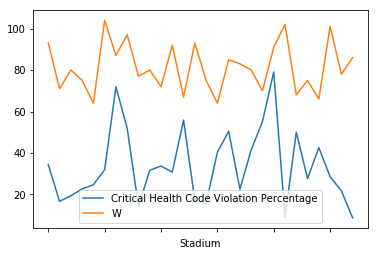

In [41]:
baseball_stadium_data[['Critical Health Code Violation Percentage', 'W']].plot()